In [41]:
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD

In [33]:
df = pd.read_excel('data/iseb3_2021/Respostas_ISE_2020_-_Dimensão_Ambiental_A_e_B.xls',true_values='X')

In [35]:
df['Unnamed: 0'] = pd.Series(df['Unnamed: 0']).fillna(method='ffill')

In [36]:
df = df.groupby(by=['Unnamed: 0','Unnamed: 1']).sum()
df = df.replace(0, np.nan)
df = df.dropna(how='all', axis=0)
df = df.replace(np.nan, 0)
df = df.replace(True,1)
df = df.T

In [47]:
df2 = pd.read_csv('teste.csv',header=[0,1],index_col=0)

In [20]:
def process_files(dirname,dest_dir='.',merge=False,save_csv=False):
    df_list = []
    if not os.path.exists(dest_dir) and save_csv:
        os.mkdir(dest_dir)
    for filepath in glob.iglob(dirname+'/*.xls'):
        df = pd.read_excel(filepath,true_values='X')
        df['Unnamed: 0'] = pd.Series(df['Unnamed: 0']).fillna(method='ffill')
        df = df.groupby(by=['Unnamed: 0','Unnamed: 1']).sum()
        df = df.replace(0, np.nan)
        df = df.dropna(how='all', axis=0)
        df = df.replace(np.nan, 0)
        df = df.replace(True,1)
        df = df.T
        df_list.append(df)
        if save_csv:
            df.to_csv(dest_dir+'/'+filepath[16:-4]+'.csv')
    if merge:
        df = pd.concat(df_list, axis=1,join='outer')
        if save_csv: df.to_csv(dest_dir+'/'+'merged'+'.csv')
        return df
    return df_list

In [21]:
a = process_files('data/iseb3_2021','teste',True,True)

In [23]:
a

Unnamed: 0                    A companhia adota hedge accounting?  \
Unnamed: 1                                                    Não   
AES TIETE ENERGIA SA                                          0.0   
B2W - COMPANHIA DIGITAL                                       0.0   
BANCO SANTANDER (BRASIL) S.A.                                 0.0   
BCO BRADESCO S.A.                                             0.0   
BCO BRASIL S.A.                                               0.0   
...                                                           ...   
ITAUSA S.A.                                                   NaN   
LIGHT S.A.                                                    NaN   
NATURA &CO HOLDING S.A.                                       NaN   
NEOENERGIA S.A.                                               NaN   
TIM PARTICIPACOES S.A.                                        NaN   

Unnamed: 0                                                             \
Unnamed: 1                    Sim e para todas as transações de hedge   
AES TIETE ENERGIA SA                                              1.0   
B2W - COMPANHIA DIGITAL                                           1.0   
BANCO SANTANDER (BRASIL) S.A.                                     0.0   
BCO BRADESCO S.A.                                                 0.0   
BCO BRASIL S.A.                                                   0.0   
...                                                               ...   
ITAUSA S.A.                                                       NaN   
LIGHT S.A.                                                        NaN   
NATURA &CO HOLDING S.A.                                           NaN   
NEOENERGIA S.A.                                                   NaN   
TIM PARTICIPACOES S.A.                                            NaN   

Unnamed: 0                                                                    \
Unnamed: 1                    Sim, mas não para todas as transações de hedge   
AES TIETE ENERGIA SA                                                     0.0   
B2W - COMPANHIA DIGITAL                                                  0.0   
BANCO SANTANDER (BRASIL) S.A.                                            0.0   
BCO BRADESCO S.A.                                                        1.0   
BCO BRASIL S.A.                                                          1.0   
...                                                                      ...   
ITAUSA S.A.                                                              NaN   
LIGHT S.A.                                                               NaN   
NATURA &CO HOLDING S.A.                                                  NaN   
NEOENERGIA S.A.                                                          NaN   
TIM PARTICIPACOES S.A.                                                   NaN   

Unnamed: 0                    A companhia calcula o lucro econômico ou outras medidas de geração de valor econômico?  \
Unnamed: 1                                                                                                       Não   
AES TIETE ENERGIA SA                                                         0.0                                       
B2W - COMPANHIA DIGITAL                                                      0.0                                       
BANCO SANTANDER (BRASIL) S.A.                                                0.0                                       
BCO BRADESCO S.A.                                                            0.0                                       
BCO BRASIL S.A.                                                              0.0                                       
...                                                                          ...                                       
ITAUSA S.A.                                                                  NaN                                       
LIGHT S.A.                     

In [30]:
df = a.fillna(0)

In [45]:
tsne = TSNE(n_components=2, random_state=1)
X = df.values

In [46]:
pca = PCA(n_components=50, random_state=1)
X_reduced = pca.fit_transform(X)

In [47]:
X_2d = tsne.fit_transform(X_reduced)

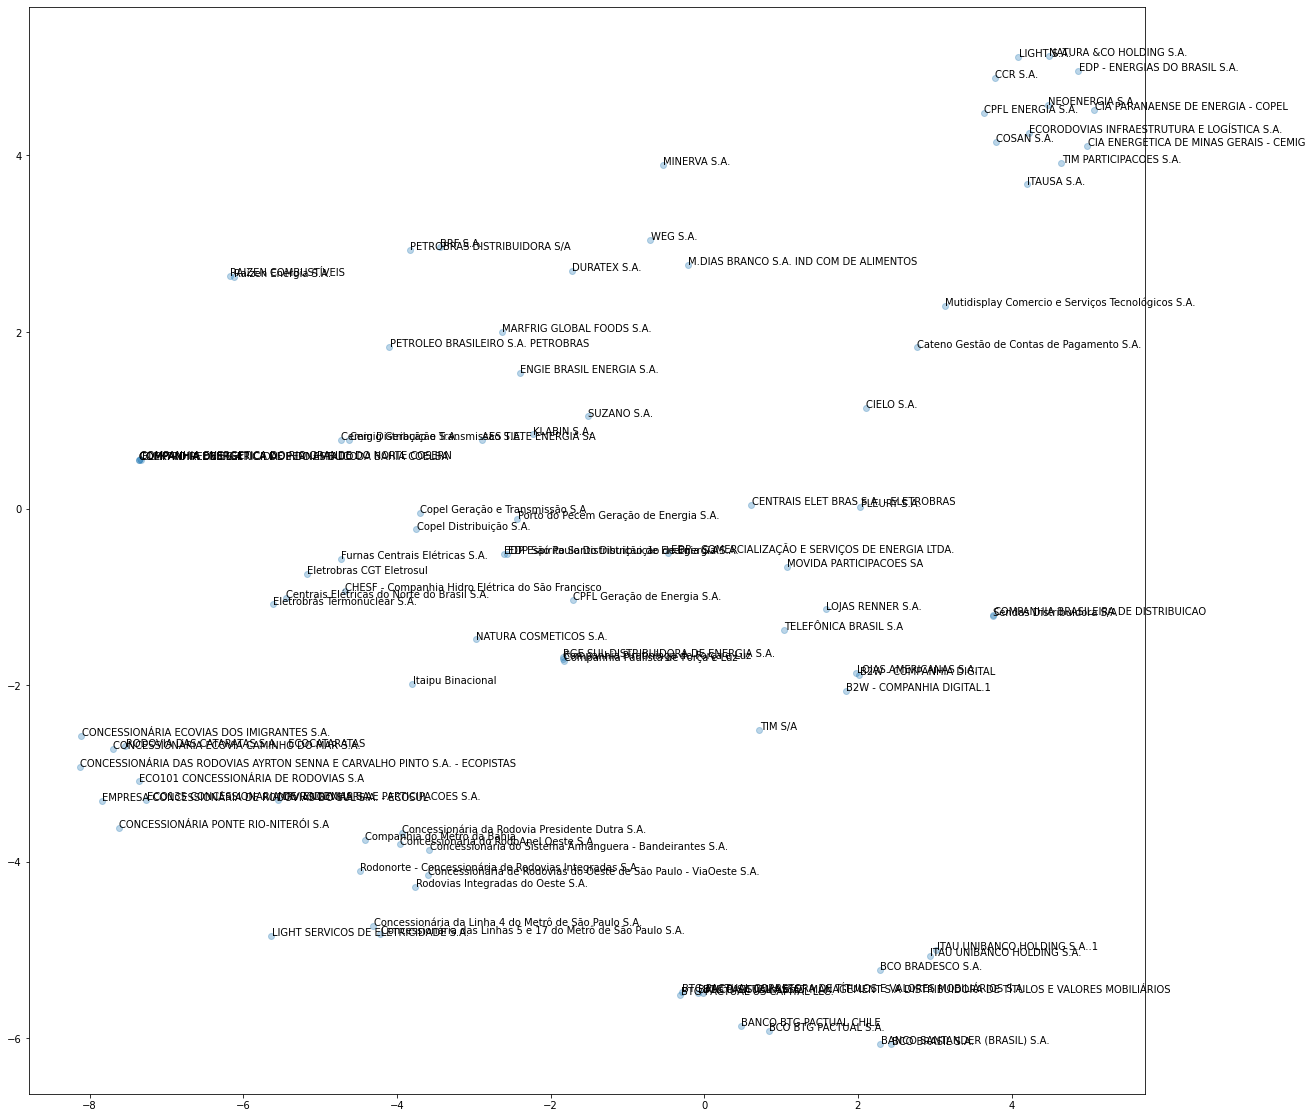

In [53]:
#target_ids = [1,2,3,4]
nomes = df.index.to_list()

fig = plt.figure(figsize=(20, 20))

plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.30)
for word, (x,y) in zip(nomes, X_2d):
        plt.text(x+0.005, y+0.005, word,fontsize='medium')
plt.show()